In [2]:
from netCDF4 import Dataset
import numpy as np

In [3]:
my_example_nc_file = 'era5.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [9]:
fh.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
fh.variables['latitude']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (361,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [23]:
fh.variables['time'][0].data

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array(1008072, dtype=int32)

In [26]:
import netCDF4

time = fh.variables['time'] # do not cast to numpy array yet 
time_convert = netCDF4.num2date(time[:], time.units, time.calendar)
time_convert

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  after removing the cwd from sys.path.


In [ ]:
fh.variables['mdww'] # direcao

In [16]:
fh.variables['pp1d'] #tp

<class 'netCDF4._netCDF4.Variable'>
int16 pp1d(time, latitude, longitude)
    scale_factor: 0.00021766882458055931
    add_offset: 8.958163622710513
    _FillValue: -32767
    missing_value: -32767
    units: s
    long_name: Peak wave period
unlimited dimensions: 
current shape = (84, 361, 720)
filling on

In [17]:
fh.variables['swh'] #hs

<class 'netCDF4._netCDF4.Variable'>
int16 swh(time, latitude, longitude)
    scale_factor: 9.925719203060976e-05
    add_offset: 3.28914062650948
    _FillValue: -32767
    missing_value: -32767
    units: m
    long_name: Significant height of combined wind waves and swell
unlimited dimensions: 
current shape = (84, 361, 720)
filling on

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[0]

'SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv'

In [42]:
fh.variables['latitude'][226] # latitude mais proxima das boias = -23

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


masked_array(data=-23.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [37]:
(fh.variables['longitude'][634] + 180) % 360 - 180 #lon mais proxima das boias eh -43

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


-43.0

In [43]:
fh.variables['swh'][:][226][634]

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


1.073521586002209

In [38]:
fh.variables['swh']

<class 'netCDF4._netCDF4.Variable'>
int16 swh(time, latitude, longitude)
    scale_factor: 9.925719203060976e-05
    add_offset: 3.28914062650948
    _FillValue: -32767
    missing_value: -32767
    units: m
    long_name: Significant height of combined wind waves and swell
unlimited dimensions: 
current shape = (84, 361, 720)
filling on

In [ ]:
dados = []
for i in fh.variables['swh'][:]:
    dados.append(i[226][634])

In [82]:
dados_array = np.asarray(dados)
ee = []
for i in range(len(dados)):
    ee.append(dados_array.mean() + 4*dados_array.std())

In [ ]:
import matplotlib.dates as mdates
import datetime

dates = []
for j in range(2015, 2022):
    for i in range(1,13):
        dates.append(datetime.datetime(j, i, 1, 0, 0))

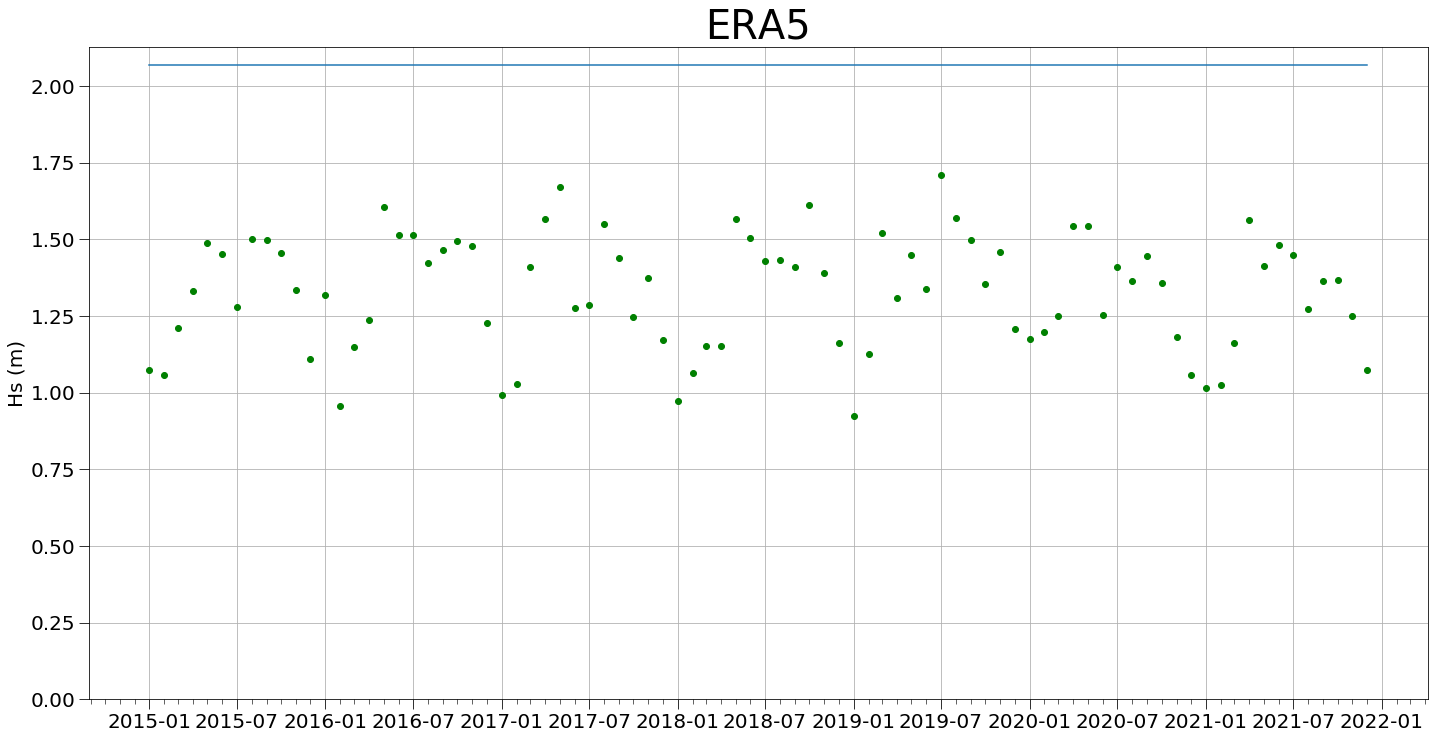

In [87]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dates, dados, marker = 'o', color = 'green', linestyle = 'none')
ax.plot(dates, ee)
# ax.plot(dado['Hsig'][:], marker = 'o', color = 'springgreen', linestyle = 'none')
# ax.plot(fh.variables['swh'][:][226][634])
# for i in fh.variables['swh'][:]:
    # ax.plot(i[226][634])

# ax.plot(dado['jump_flag'][:], marker = 'o', color = 'darkviolet', linestyle = 'none')
# ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


# ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'blue', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0)
# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('ERA5', fontsize = 40)



plt.savefig(os.getcwd() +'/fig/reanalise')

In [91]:
from windrose import WindroseAxes

In [96]:
hs = []
for i in fh.variables['swh'][:]:
    hs.append(i[226][634])
    
dp = []
for i in fh.variables['mdww'][:]:
    dp.append(i[226][634])
    
tp = []
for i in fh.variables['pp1d'][:]:
    tp.append(i[226][634])

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` 

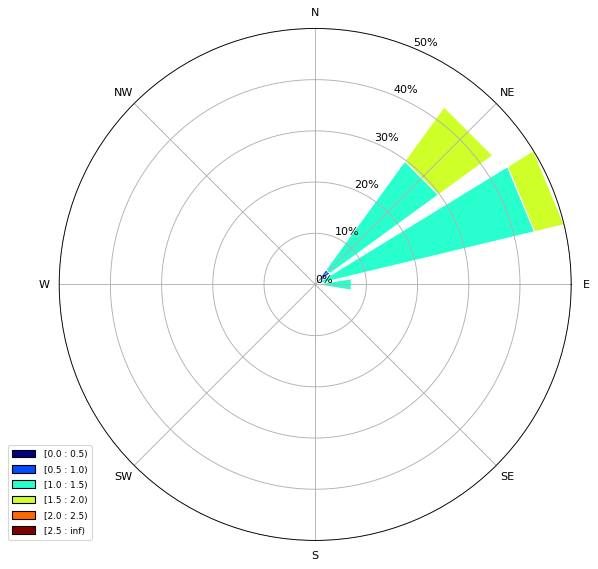

In [105]:
ax = WindroseAxes.from_ax()
ax.bar(dp, hs, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/reanalise_rosaHs')

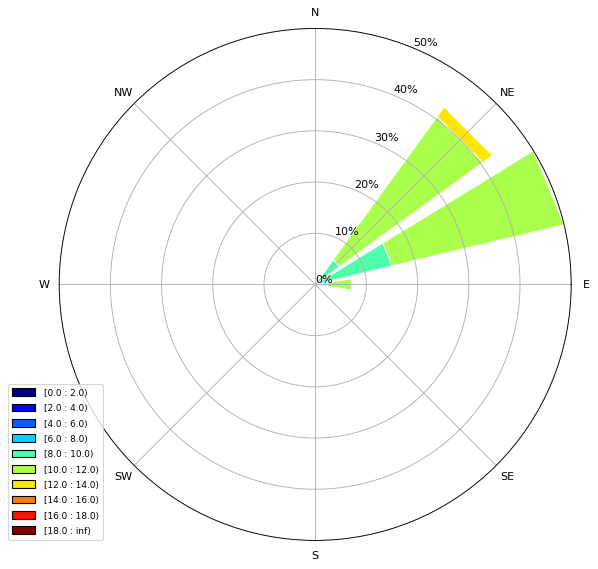

In [106]:
ax = WindroseAxes.from_ax()
ax.bar(dp, tp, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/reanalise_rosaTp')

In [100]:
fh.variables['mdww']

<class 'netCDF4._netCDF4.Variable'>
int16 mdww(time, latitude, longitude)
    scale_factor: 0.005493470274152032
    add_offset: 179.99905518078174
    _FillValue: -32767
    missing_value: -32767
    units: degrees
    long_name: Mean direction of wind waves
unlimited dimensions: 
current shape = (84, 361, 720)
filling on

In [101]:
dp[0]

58.72520540860148